# Quantitative Portfolio Management
# Assignment 1

---

# Exercise 1a)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import risk_matrix
from pypfopt.efficient_frontier import EfficientFrontier
from matplotlib import style
style.use('dark_background')
# import seaborn as sns; sns.set_theme()

In [2]:
#import data
data_price = pd.read_excel("Assignments2021_QPM_corrected_09-12-2021.xlsm", sheet_name = "STOXX Global 100 - Price Data")
data_etf = pd.read_excel("Assignments2021_QPM_corrected_09-12-2021.xlsm", sheet_name = "Xtrackers STOXX Global 100 ETF")

In [3]:
#clean price data
#data_price - only keep the rows: ticker, initial weights and price time series
df_price = data_price.drop([0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
df_price.reset_index(drop=True, inplace = True)
df_price = df_price.set_index("Ticker")

#create new df for the weights
df_weights = df_price.iloc[:1]/100
#rename index
df_weights.index = df_weights.index.rename("")

#delete weights form other df
df_price = df_price.iloc[1:]
#rename index
df_price.index = df_price.index.rename("Date")

In [4]:
#set start and end dates

#create new df with pct changes
stock_price_chg = df_price.truncate("2017-01-01", "2021-08-30").pct_change()

In [5]:
#create df that includes the portfolio returns
port_return = pd.DataFrame()
port_return["Returns: 1/n weighting"]   = (stock_price_chg / 100)                                 .sum(axis=1)
port_return["Returns: given weighting"] = (stock_price_chg * df_weights.loc["Portfolio Weight"])  .sum(axis=1) 

#total return since given start date
port_return["Cumulative Return: 1/n weighting"]   = (port_return["Returns: 1/n weighting"]+1).cumprod()
port_return["Cumulative Return: given weighting"] = (port_return["Returns: given weighting"]+1).cumprod()

#Portfolio value given Investment of 10_000_000€
initial_investment = 10_000_000
port_return["Portfolio value: 1/n weighting"] = port_return["Cumulative Return: 1/n weighting"] * initial_investment
port_return["Portfolio value: given weighting"] = port_return["Cumulative Return: given weighting"] * initial_investment

In [6]:
#clean etf data
data_etf = data_etf.set_index("Date")
etf = data_etf.loc["2017-01-01":"2021-08-30", :]

port_return["ETF return"] = etf["Daily Return (Index)"]
port_return["Cumulative ETF return"] = (etf["Daily Return (Index)"]+1).cumprod()
port_return["Portfolio value: ETF"] = port_return["Cumulative ETF return"] * initial_investment

C:\Programs\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Programs\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


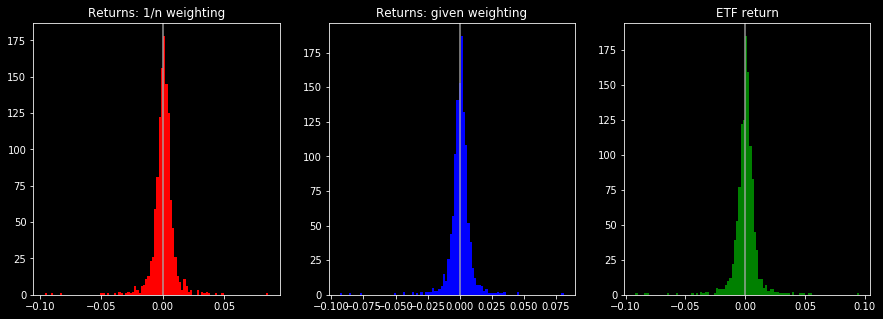

In [7]:
#plotting the returns in histograms
x1 = port_return["Returns: 1/n weighting"]
x2 = port_return["Returns: given weighting"]
x3 = port_return["ETF return"]

fig, ax = plt.subplots(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(x1, bins=100, color="red")
plt.title(x1.name)
plt.axvline(0, c = 'darkgrey', alpha = 0.9)

plt.subplot(1,3,2)
plt.hist(x2, bins=100, color="blue")
plt.title(x2.name)
plt.axvline(0, c = 'darkgrey', alpha = 0.9)

plt.subplot(1,3,3)
plt.hist(x3, bins=100, color="green")
plt.title(x3.name)
plt.axvline(0, c = 'darkgrey', alpha = 0.9)

plt.show()

C:\Programs\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


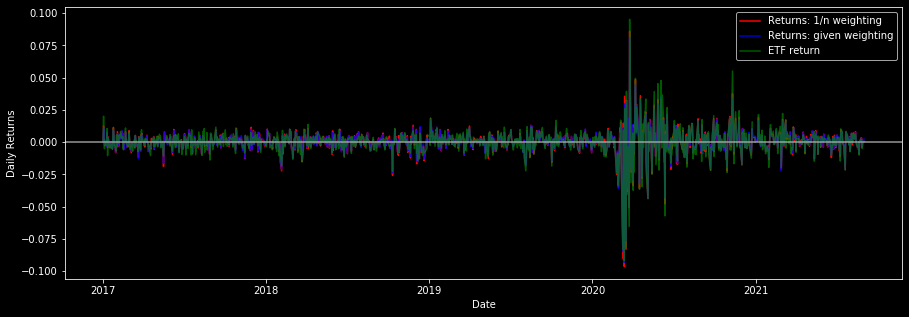

In [8]:
#plotting the returns as lines
plt.figure(figsize=(15,5))
plt.plot(x1.index, x1, label = x1.name, color = "red")
plt.plot(x2.index, x2, label = x2.name, color = "blue", alpha = 0.8)
plt.plot(x3.index, x3, label = x3.name, color = "green", alpha = 0.7)
plt.legend()
plt.axhline(0, c = 'darkgrey', alpha = 0.9)
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.show()

No handles with labels found to put in legend.


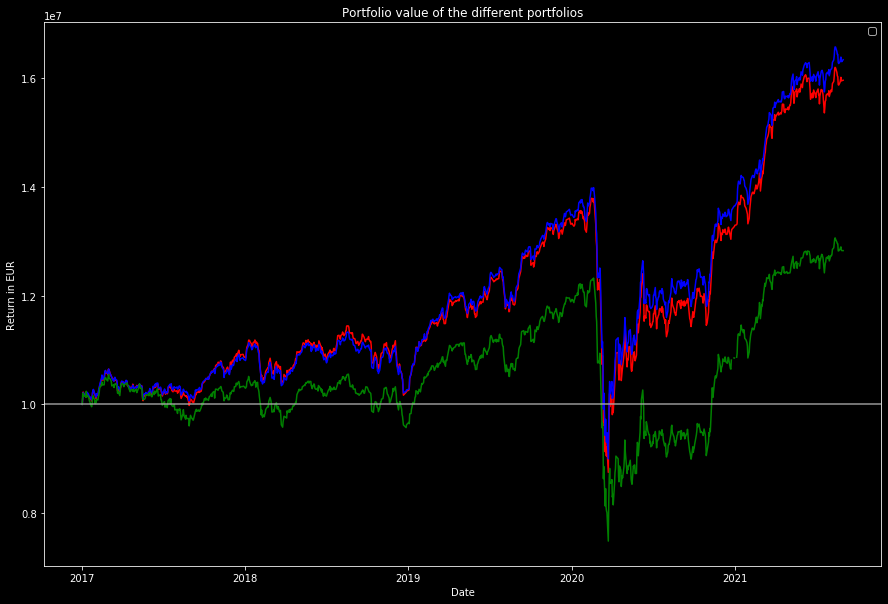

In [9]:
#plotting the cumalitve return over the period in EUR
plt.figure(figsize=(15,10))

x1 = port_return["Portfolio value: 1/n weighting"]
x2 = port_return["Portfolio value: given weighting"]
x3 = port_return["Portfolio value: ETF"]

plt.plot(x1.index, x1, color= "red")
plt.plot(x2.index, x2, color= "blue")
plt.plot(x3.index, x3, color= "green")

plt.legend()
plt.title("Portfolio value of the different portfolios")
plt.xlabel("Date")
plt.ylabel("Return in EUR")

plt.axhline(10_000_000, c = 'darkgrey', alpha = 0.9)

plt.show()

The ETF return is lower than any of the other returns. With the 1/n and given weighting approch having similar results.
Management fees could impact the outcome lowering the return of the ETF and constant rebalancing could lower the return of the other strategies.
At this point, however, we can say that there is an economic differences between the ETF return and the return of the other two strategies, this is mainly driven by the return in rising markets as in downturns the loss looks to be similar.

In [10]:
#return in numbers
n_change  = round((port_return["Cumulative Return: 1/n weighting"].iloc[-1]-1)   *100, 2)
const_chg = round((port_return["Cumulative Return: given weighting"].iloc[-1]-1) *100, 2)
etf_chg   = round((port_return["Cumulative ETF return"].iloc[-1]-1)              *100, 2)

print("The total return with the 1/n weighting is: " + str(n_change) + "%")
print("The total return with given weighting is: "   + str(const_chg) + "%")
print("The total return with ETF is: "               + str(etf_chg) + "%")

print("\nWith a starting amount of " + str(initial_investment) + " EUR this translates into the following EUR changes:\n")

#return in EUR
print("The total EUR return with the 1/n weighting is: " + str(n_change * initial_investment/100_000_000)  + " mEUR")
print("The total EUR return with given weighting is: "   + str(const_chg * initial_investment/100_000_000) + " mEUR")
print("The total EUR return with ETF is: "               + str(etf_chg * initial_investment/100_000_000)   + " mEUR")

The total return with the 1/n weighting is: 59.59%
The total return with given weighting is: 63.37%
The total return with ETF is: 28.27%

With a starting amount of 10000000 EUR this translates into the following EUR changes:

The total EUR return with the 1/n weighting is: 5.959 mEUR
The total EUR return with given weighting is: 6.337 mEUR
The total EUR return with ETF is: 2.827 mEUR


# Exercise 1b)

In [11]:
def max_dd(total_r_series, days=250, minmin = True):
    """
    Maximum Draw-down during the last 12M
    """
    if minmin == True:
        roll_max = total_r_series.rolling(min_periods=1,window=days).max()

        daily_drawdown = total_r_series / roll_max - 1

        max_daily_drawdown = daily_drawdown.rolling(min_periods=1,window=days).min().min()

        return max_daily_drawdown
        
    else:
        roll_max = total_r_series.rolling(min_periods=1,window=days).max()

        daily_drawdown = total_r_series / roll_max - 1

        max_daily_drawdown = daily_drawdown.rolling(min_periods=1,window=days).min()

        return max_daily_drawdown

def sharpe(rf, return_pa, vola_pa):
    """
    Sharpe Ratio based on the last 12M
    """
    sharpe_ratio = (return_pa - rf) / vola_pa
    return sharpe_ratio

def ce(return_series, rolling= False):
    """
    Certainty equivilant is calculated by 1) calculating the mean utility an investor with a log utility funciton is expected
    to have and 2) convert this into a save return that would offer the same utility
    """
    if rolling == True:
        ce =  np.exp(np.log(return_series +1).rolling(min_periods=1,window=250) .mean()) -1
    else:
        ce =  np.exp(np.log(return_series +1).mean()) -1
    return ce

In [12]:
#data always describing the last 12m
df_1b = pd.DataFrame()

#retrun ltm
df_1b["Return LTM: 1/N"] = port_return["Cumulative Return: 1/n weighting"] / port_return["Cumulative Return: 1/n weighting"].shift(250) -1
df_1b["Return LTM: const. weights"] = port_return["Cumulative Return: given weighting"] / port_return["Cumulative Return: given weighting"].shift(250) -1
df_1b["Return LTM: ETF"] = port_return["Cumulative ETF return"] / port_return["Cumulative ETF return"].shift(250) -1

#vola ltm
df_1b["Vola LTM: 1/N"]   = port_return["Returns: 1/n weighting"].rolling("250D").std() * sqrt(250)
df_1b["Vola LTM: const. weights"]   = port_return["Returns: given weighting"].rolling("250D").std() * sqrt(250)
df_1b["Vola LTM: ETF"]   = port_return["ETF return"].rolling("250D").std() * sqrt(250)

#skewness ltm
df_1b["Skewness LTM: 1/N"] = port_return["Returns: 1/n weighting"].rolling("250D").skew()
df_1b["Skewness LTM: const. weights"] = port_return["Returns: given weighting"].rolling("250D").skew()
df_1b["Skewness LTM: ETF"] = port_return["ETF return"].rolling("250D").skew()

#max dd ltm
df_1b["Max DD LTM: 1/N"] = max_dd(port_return["Cumulative Return: 1/n weighting"], minmin=False)
df_1b["Max DD LTM: const. weights"] = max_dd(port_return["Cumulative Return: given weighting"], minmin=False)
df_1b["Max DD LTM: ETF"] = max_dd(port_return["Cumulative ETF return"], minmin=False)

#sharpe ratio ltm
rf = 0
df_1b["Sharpe Ratio LTM: 1/N"] = sharpe(rf, df_1b["Return LTM: 1/N"], df_1b["Vola LTM: 1/N"])
df_1b["Sharpe Ratio LTM: const. weights"] = sharpe(rf, df_1b["Return LTM: const. weights"], df_1b["Vola LTM: const. weights"])
df_1b["Sharpe Ratio LTM: ETF"] = sharpe(rf, df_1b["Return LTM: ETF"], df_1b["Vola LTM: ETF"])

#CE ltm
df_1b["CE: 1/N"] = ce(df_1b["Return LTM: 1/N"], rolling= True)
df_1b["CE: const. weights"] = ce(df_1b["Return LTM: const. weights"], rolling= True)
df_1b["CE: ETF"] = ce(df_1b["Return LTM: ETF"], rolling= True)
df_1b.truncate("2020-01-01").head()

,Return LTM: 1/N,Return LTM: const. weights,Return LTM: ETF,Vola LTM: 1/N,Vola LTM: const. weights,Vola LTM: ETF,Skewness LTM: 1/N,Skewness LTM: const. weights,Skewness LTM: ETF,Max DD LTM: 1/N,Max DD LTM: const. weights,Max DD LTM: ETF,Sharpe Ratio LTM: 1/N,Sharpe Ratio LTM: const. weights,Sharpe Ratio LTM: ETF,CE: 1/N,CE: const. weights,CE: ETF
Date,,,,,,,,,,,,,,,,,,
2020-01-02,0.295474,0.309579,0.236972,0.081538,0.078710,0.089688,-0.690218,-0.651675,-0.457977,-0.084313,-0.074528,-0.069311,3.623765,3.933145,2.642194,0.106505,0.121161,0.084391
2020-01-03,0.270166,0.285375,0.213347,0.081337,0.078509,0.089438,-0.684574,-0.646807,-0.455175,-0.077857,-0.067636,-0.068801,3.321575,3.634943,2.385415,0.107798,0.122508,0.085482
2020-01-06,0.257989,0.271994,0.207447,0.081650,0.078819,0.089791,-0.669837,-0.634070,-0.445143,-0.074103,-0.063340,-0.068801,3.159673,3.450859,2.310339,0.109042,0.123796,0.086573
2020-01-07,0.253649,0.267388,0.202783,0.081579,0.078738,0.089853,-0.680334,-0.646448,-0.462501,-0.066769,-0.060048,-0.068801,3.109252,3.395926,2.256825,0.110284,0.125078,0.087631
2020-01-08,0.245292,0.256828,0.200292,0.081456,0.078638,0.089722,-0.676110,-0.637679,-0.456585,-0.066769,-0.060048,-0.068801,3.011345,3.265945,2.232366,0.111456,0.126274,0.088648


In [13]:
#mean daily return, volatility, skewness, sharpe_ratio, max_dd, CE over the entire time frame
rf = 0

n_mean     = port_return["Returns: 1/n weighting"].mean()
const_mean = port_return["Returns: given weighting"].mean()
etf_mean   = port_return["ETF return"].mean()

print("1/n return mean: ", n_mean, "\nConstant weights return mean: ", const_mean, "\nETF return mean: ", etf_mean)

n_vola     = port_return["Returns: 1/n weighting"].std()
const_vola = port_return["Returns: given weighting"].std()
etf_vola   = port_return["ETF return"].std()

print("\n1/n return volatility: ", n_vola, "\nConstant weights return volatility: ", const_vola, "\nETF return volatility: ", etf_vola)

n_skew     = port_return["Returns: 1/n weighting"].skew()
const_skew = port_return["Returns: given weighting"].skew()
etf_skew   = port_return["ETF return"].skew()

print("\n1/n return skewness: ", n_skew, "\nConstant weights return skewness: ", const_skew, "\nETF return skewness: ", etf_skew)

n_ce     = ce(port_return["Returns: 1/n weighting"])
const_ce = ce(port_return["Returns: given weighting"])
etf_ce   = ce(port_return["ETF return"])

print("\n1/n CE: ", n_ce, "\nConstant weights CE: ", const_ce, "\nETF CE: ", etf_ce)

n_sharpe     = sharpe(rf, (n_mean +1)**250-1, n_vola**(0.5))
const_sharpe = sharpe(rf, (const_mean +1)**250-1, const_vola**(0.5))
etf_sharpe   = sharpe(rf, (etf_mean +1)**250-1, etf_vola**(0.5))

print("\n1/n Sharpe Ratio: ", n_sharpe, "\nConstant weights Sharpe Ratio: ", const_sharpe, "\nETF Sharpe Ratio: ", etf_sharpe)

n_maxdd     = max_dd(port_return["Cumulative Return: 1/n weighting"])
const_maxdd = max_dd(port_return["Cumulative Return: given weighting"])
etf_maxdd   = max_dd(port_return["Cumulative ETF return"])

print("\n1/n maximum drawdown: ", n_maxdd, "\nConstant weights maximum drawdown: ", const_maxdd, "\nETF maximum drawdown: ", etf_maxdd)

1/n return mean:  0.0004443244049895109 
Constant weights return mean:  0.0004592471789471518 
ETF return mean:  0.0002653494486248103

1/n return volatility:  0.009546763056833359 
Constant weights return volatility:  0.00901545086794617 
ETF return volatility:  0.010268099886373434

1/n return skewness:  -1.7400286426038343 
Constant weights return skewness:  -1.7846818446932993 
ETF return skewness:  -0.8535365053782054

1/n CE:  0.0003982422077744019 
Constant weights CE:  0.00041817173449887335 
ETF CE:  0.0002123099195230349

1/n Sharpe Ratio:  1.2021381949402994 
Constant weights Sharpe Ratio:  1.281022661952932 
ETF Sharpe Ratio:  0.6767655057457932

1/n maximum drawdown:  -0.36542049462355075 
Constant weights maximum drawdown:  -0.3565738882575834 
ETF maximum drawdown:  -0.3924543057514024


In [14]:
#quarterly results
returns_quarter = port_return.groupby(pd.Grouper(freq="Q"))

#calculate mean return, volatility, skewness, sharpe_ratio, max_dd for each quarter
#the results will be series, too

#return per each quarter
n_mean_q     = (returns_quarter["Returns: 1/n weighting"].mean()  +1)  **62.5 -1 #days per quarter
const_mean_q = (returns_quarter["Returns: given weighting"].mean()+1)  **62.5 -1 #days per quarter
etf_mean_q   = (returns_quarter["ETF return"].mean()   +1)             **62.5 -1 #days per quarter

#annualized vola per each quarter
n_vola_q     = returns_quarter["Returns: 1/n weighting"].std()         * sqrt(250) #annualized vola
const_vola_q = returns_quarter["Returns: given weighting"].std()       * sqrt(250) #annualized vola
etf_vola_q   = returns_quarter["ETF return"].std()                     * sqrt(250) #annualized vola

#skewness per quarter
n_skew_q     = returns_quarter["Returns: 1/n weighting"].skew()
const_skew_q = returns_quarter["Returns: given weighting"].skew()
etf_skew_q   = returns_quarter["ETF return"].skew()

#sharpe ratio per quarter
n_sharpe_q     = sharpe(rf, (n_mean_q +1)**4 -1,     n_vola_q)
const_sharpe_q = sharpe(rf, (const_mean_q + 1)**4 -1, const_vola_q)
etf_sharpe_q   = sharpe(rf, (etf_mean_q + 1)**4 -1,   etf_vola_q)

n_maxdd_q     = returns_quarter["Cumulative Return: 1/n weighting"].apply(max_dd)
const_maxdd_q = returns_quarter["Cumulative Return: given weighting"].apply(max_dd)
etf_maxdd_q   = returns_quarter["Cumulative ETF return"].apply(max_dd)

#CE ltm
n_ce_q     = returns_quarter["Returns: 1/n weighting"].apply(ce)
const_ce_q = returns_quarter["Returns: given weighting"].apply(ce)
etf_ce_q   = returns_quarter["ETF return"].apply(ce)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


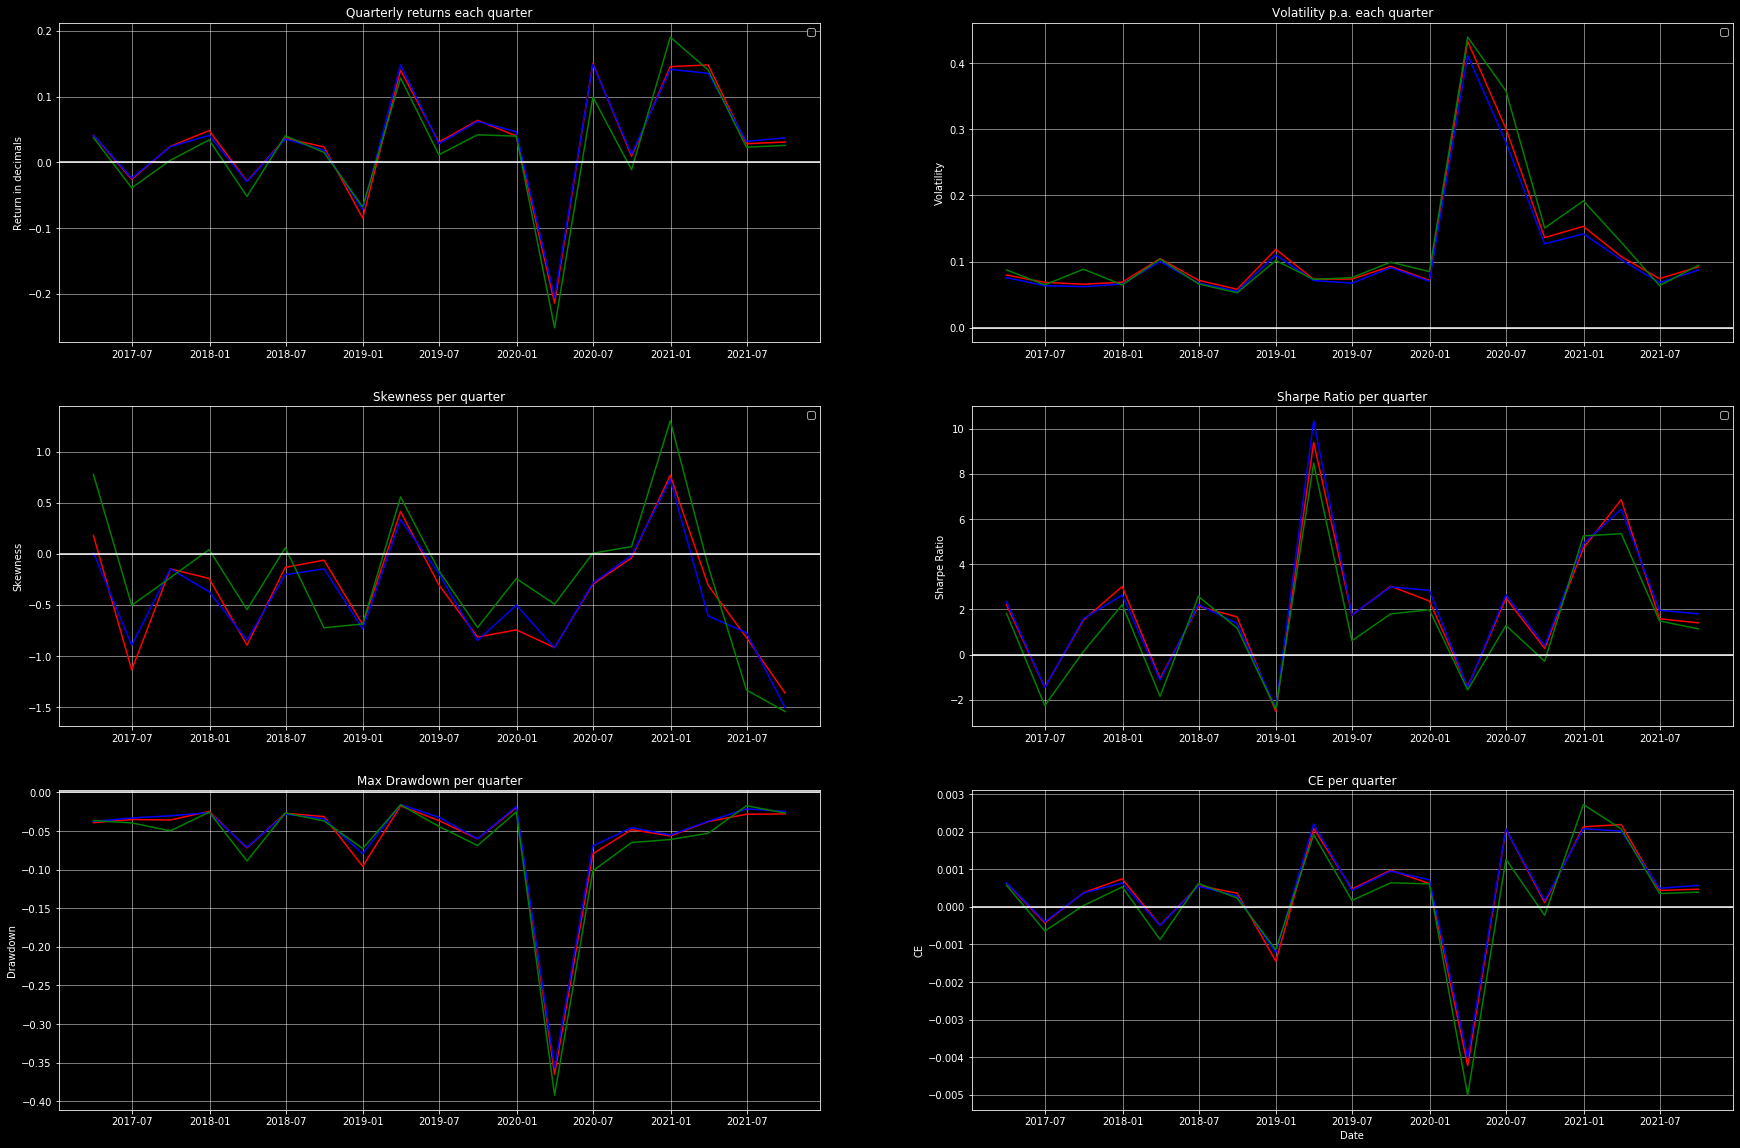

In [15]:
#displaying results

fig, ax = plt.subplots(figsize=(30,20))

plt.subplot(3,2,1)
plt.grid(alpha = 0.6)
x1 = n_mean_q
x2 = const_mean_q
x3 = etf_mean_q
plt.plot(x1.index, x1, color= "red")
plt.plot(x2.index, x2, color= "blue")
plt.plot(x3.index, x3, color= "green")
plt.legend()
plt.title("Quarterly returns each quarter")
#plt.xlabel("Date")
plt.ylabel("Return in decimals")
plt.axhline(0)

plt.subplot(3,2,2)
plt.grid(alpha = 0.6)
x1 = n_vola_q
x2 = const_vola_q
x3 = etf_vola_q
plt.plot(x1.index, x1, color= "red")
plt.plot(x2.index, x2, color= "blue")
plt.plot(x3.index, x3, color= "green")
plt.legend()
plt.title("Volatility p.a. each quarter")
#plt.xlabel("Date")
plt.ylabel("Volatility")
plt.axhline(0)

plt.subplot(3,2,3)
plt.grid(alpha = 0.6)
x1 = n_skew_q
x2 = const_skew_q
x3 = etf_skew_q
plt.plot(x1.index, x1, color= "red")
plt.plot(x2.index, x2, color= "blue")
plt.plot(x3.index, x3, color= "green")
plt.legend()
plt.title("Skewness per quarter")
#plt.xlabel("Date")
plt.ylabel("Skewness")
plt.axhline(0)

plt.subplot(3,2,4)
plt.grid(alpha = 0.6)
x1 = n_sharpe_q
x2 = const_sharpe_q
x3 = etf_sharpe_q
plt.plot(x1.index, x1, color= "red")
plt.plot(x2.index, x2, color= "blue")
plt.plot(x3.index, x3, color= "green")
plt.legend()
plt.title("Sharpe Ratio per quarter")
#plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.axhline(0)

plt.subplot(3,2,5)
plt.grid(alpha = 0.6)
x1 = n_maxdd_q
x2 = const_maxdd_q
x3 = etf_maxdd_q
plt.plot(x1.index, x1, color= "red")
plt.plot(x2.index, x2, color= "blue")
plt.plot(x3.index, x3, color= "green")
plt.title("Max Drawdown per quarter")
#plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.axhline(0)

plt.subplot(3,2,6)
plt.grid(alpha = 0.6)
x1 = n_ce_q
x2 = const_ce_q
x3 = etf_ce_q
plt.plot(x1.index, x1, color= "red")
plt.plot(x2.index, x2, color= "blue")
plt.plot(x3.index, x3, color= "green")
plt.title("CE per quarter")
plt.xlabel("Date")
plt.ylabel("CE")
plt.axhline(0)

plt.show()

---

# Exercise 2a)

In [16]:
#import data from file
# data_price = pd.read_excel("Assignments2021_QPM_corrected_09-12-2021.xlsm", sheet_name = "STOXX Global 100 - Price Data")

#clean price data
#data_price - only keep the rows: ticker, initial weights and price time series
df_price = data_price.drop([0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
df_price.reset_index(drop=True, inplace = True)
df_price = df_price.set_index("Ticker")

#delete weights form other df
df_price = df_price.iloc[1:]
#rename index
df_price.index = df_price.index.rename("Date")
df_price = df_price.truncate("2017-01-01", "2021-08-31")

In [17]:
#First input data
input_1 = df_price.truncate("2017-01-02", "2017-12-29")

mu_1 = mean_historical_return(input_1, compounding = True)
s_1 = risk_matrix(input_1, method="sample_cov")

In [18]:
ef =  EfficientFrontier(mu_1, s_1)
weights = ef.max_sharpe(risk_free_rate=0)
cleaned_weights = ef.clean_weights(cutoff= 0.01)

In [19]:
# create a df with the different weights
df_weights = pd.DataFrame(weights, columns=weights.keys(), index=["Weight"])
df_cweights = pd.DataFrame(cleaned_weights, columns=weights.keys(), index=["Clean weight"])
df_weights = df_weights.append(df_cweights)

#adjusting the weights that were cutoff
total_cweight = df_weights.loc["Clean weight",:].sum()
df_weights.loc["Clean weight"] = df_weights.loc["Clean weight"] / total_cweight

df_weights

,FMG.AX,GSK.L,0006.HK,HVN.AX,SSE.L,LGEN.L,IGG.L,CEN.NZ,POW.TO,NN.AS,...,UBSG.SW,LMT,MET,3918.HK,SJM,FITB,TFC,AMGN,CAG,HPQ
Weight,0.0,0.0,0.0,0.0,0.0,0.0,0.082011,0.0,0.0,0.005797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Clean weight,0.0,0.0,0.0,0.0,0.0,0.0,0.083421,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#In-sample performance
df_chg = df_price.pct_change().truncate("2017-01-01", "2017-12-31")

port_return = pd.DataFrame()

#return data
port_return["Returns: max_sharpe weights"]       = (df_chg * df_weights.loc["Weight"])         .sum(axis=1)
port_return["Returns: clean max_sharpe weights"] = (df_chg * df_weights.loc["Clean weight"])   .sum(axis=1)

#cumulative_return data
port_return["Cumulative Return: max_sharpe weights"]       = (port_return["Returns: max_sharpe weights"]+1).cumprod()
port_return["Cumulative Return: clean max_sharpe weights"] = (port_return["Returns: clean max_sharpe weights"]+1).cumprod()

#in sample return
is_return    = port_return["Cumulative Return: max_sharpe weights"][-1]       -1
is_return_cw = port_return["Cumulative Return: clean max_sharpe weights"][-1] -1

#vola
is_vola = port_return["Returns: max_sharpe weights"].std()          * sqrt(250)
is_vola_cw = port_return["Returns: clean max_sharpe weights"].std() * sqrt(250)

#sharpe ratio
rf = 0
is_sharpe    = (is_return - rf)   / is_vola
is_sharpe_cw = (is_return_cw -rf) / is_vola_cw

print(is_return, is_return_cw, "\n",  is_vola, is_vola_cw,"\n" , is_sharpe, is_sharpe_cw)

0.4128667208017758 0.4158269059551156 
 0.06878265916839076 0.06927331372798538 
 6.002482686675623 6.002699792707156


In [21]:
#First quarter 2018
df_chg_oos = df_price.pct_change().truncate("2018-01-01", "2018-03-31")

port_return_oos = pd.DataFrame()

#return data
port_return_oos["Returns: max_sharpe weights"]       = (df_chg_oos * df_weights.loc["Weight"])         .sum(axis=1)
port_return_oos["Returns: clean max_sharpe weights"] = (df_chg_oos * df_weights.loc["Clean weight"])   .sum(axis=1)

#cumulative_return data
port_return_oos["Cumulative Return: max_sharpe weights"]       = (port_return_oos["Returns: max_sharpe weights"]+1).cumprod()
port_return_oos["Cumulative Return: clean max_sharpe weights"] = (port_return_oos["Returns: clean max_sharpe weights"]+1).cumprod()


#oos return
oos_return    = port_return_oos["Cumulative Return: max_sharpe weights"][-1]       **4  -1
oos_return_cw = port_return_oos["Cumulative Return: clean max_sharpe weights"][-1] **4  -1

#oos vola
oos_vola = port_return_oos["Returns: max_sharpe weights"].std()          * sqrt(250)
oos_vola_cw = port_return_oos["Returns: clean max_sharpe weights"].std() * sqrt(250)

#oos sharpe ratio
rf = 0
oos_sharpe    = (oos_return - rf)   / oos_vola
oos_sharpe_cw = (oos_return_cw -rf) / oos_vola_cw

print(oos_return, oos_return_cw, "\n",  oos_vola, oos_vola_cw,"\n" , oos_sharpe, oos_sharpe_cw)

0.045508463203702165 0.049866269161524146 
 0.1247301025144948 0.12528506766422415 
 0.36485549427343456 0.3980224466587708


# Exercise 2b)

In [22]:
#find dates at which the quarter ends
df_price.index = pd.to_datetime(df_price.index)
df_quarter = df_price.truncate("2017-01-01")
df_quarter["Quarter"] = df_quarter.index.quarter
#returns_quarter.head()

# idea: create a for loop that detected if quarter (last column) has changed, if so it returns the position(row) in the df
#then take returns between two dates

liste = []
for index in range(len(df_quarter["Quarter"])):
    if liste == []:
        liste.append(index)
    elif df_quarter["Quarter"][index] == df_quarter["Quarter"][index-1]:
        continue
    else:
        liste.append(index)

print(liste)
df_quarter.head(5)

[0, 65, 126, 189, 250, 313, 375, 440, 501, 564, 625, 691, 752, 816, 877, 943, 1007, 1069, 1131]


,FMG.AX,GSK.L,0006.HK,HVN.AX,SSE.L,LGEN.L,IGG.L,CEN.NZ,POW.TO,NN.AS,...,LMT,MET,3918.HK,SJM,FITB,TFC,AMGN,CAG,HPQ,Quarter
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,2.59913,14.1124,5.11917,2.36338,12.9679,2.07295,4.19664,2.34421,16.2063,23.7991,...,208.931,38.1205,0.424492,105.492,21.93,37.9462,120.688,32.8914,12.2484,1
2017-01-03,2.64424,14.2619,5.2196,2.39003,13.1221,2.10674,4.28657,2.34421,16.5093,24.1153,...,214.082,38.8194,0.421392,107.412,22.2375,38.3317,125.79,33.4304,12.3917,1
2017-01-04,2.71206,14.3634,5.22263,2.37357,12.9751,2.13602,4.33911,2.3685,16.7272,23.9903,...,215.483,39.1843,0.427018,107.457,22.6284,38.7741,128.067,32.9936,12.6321,1
2017-01-05,2.70747,14.4558,5.16786,2.37814,13.0356,2.09287,4.37685,2.40081,16.7726,23.7072,...,215.497,38.3478,0.437136,107.168,21.8152,37.9794,127.171,32.6219,12.5264,1
2017-01-06,2.70832,14.4237,5.15386,2.38499,12.9645,2.10678,4.54694,2.39531,16.7062,23.88,...,214.921,38.215,0.429013,105.992,21.7857,37.8527,129.039,32.1248,12.3447,1


In [23]:
#calibration window

MSR_weights = pd.DataFrame()

oos_quarter = 1
for value in liste:
    if value > 250:
        input_ = df_price.iloc[value-250 : value]                     #have a timeframe that has one year and ends at quarter end
        mu_ = mean_historical_return(input_, compounding = True)
        s_ = risk_matrix(input_, method="sample_cov")

        ef_ =  EfficientFrontier(mu_, s_)
        MSR_weights_ = ef_.max_sharpe(risk_free_rate=0)
        MSR_cleaned_weights_ = ef_.clean_weights(cutoff= 0.01)

        #capture weights
        MSR_weights_df = pd.DataFrame(MSR_weights_, columns=MSR_weights_.keys(), index=["Weight " + str(oos_quarter)])
        MSR_c_weights_df = pd.DataFrame(MSR_cleaned_weights_, columns=MSR_cleaned_weights_.keys(), index=["Clean weight " + str(oos_quarter)])
        MSR_weights_df = MSR_weights_df.append(MSR_c_weights_df)
        MSR_total_cweight = MSR_weights_df.loc["Clean weight " + str(oos_quarter), :].sum()
        MSR_weights_df.loc["Clean weight " + str(oos_quarter)] = MSR_weights_df.loc["Clean weight " + str(oos_quarter)] / MSR_total_cweight

        MSR_weights = MSR_weights.append(MSR_weights_df)

        oos_quarter += 1

MSR_weights.head()

,FMG.AX,GSK.L,0006.HK,HVN.AX,SSE.L,LGEN.L,IGG.L,CEN.NZ,POW.TO,NN.AS,...,UBSG.SW,LMT,MET,3918.HK,SJM,FITB,TFC,AMGN,CAG,HPQ
Weight 1,0.0,0.0,0.0,0.0,0.0,0.0,0.124596,0.0,0.0,0.029401,...,0.0,0.0,0.0,0.052876,0.0,0.0,0.0,0.0,0.0,0.0
Clean weight 1,0.0,0.0,0.0,0.0,0.0,0.0,0.124599,0.0,0.0,0.029400,...,0.0,0.0,0.0,0.052879,0.0,0.0,0.0,0.0,0.0,0.0
Weight 2,0.0,0.0,0.0,0.0,0.0,0.0,0.077916,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.073590,0.0,0.0,0.0,0.0,0.0,0.0
Clean weight 2,0.0,0.0,0.0,0.0,0.0,0.0,0.078298,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.073947,0.0,0.0,0.0,0.0,0.0,0.0
Weight 3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.047307,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
counter = 0
iloc_counter = 2
MSR_df_oos = pd.DataFrame(columns=["Return", "Return clean", "Vola", "Vola clean", "Sharpe Ratio", "Sharpe Ratio clean", "Max. DD", "Max. DD clean"])

for value in liste:
    if value > 330:
        input_oos = df_price.iloc[value-63 : value].pct_change()                   #have a timeframe that has one quarter and ends at quarter end
        MSR_performance_df = pd.DataFrame()
        MSR_performance_df["returns_raw"]     = (input_oos * MSR_weights.iloc[counter])    .sum(axis=1)
        MSR_performance_df["returns_cleaned"] = (input_oos * MSR_weights.iloc[counter +1]) .sum(axis=1)        

        #now that we have return series, take mean, std, max_dd and sharpe ratio
        MSR_return_raw   = MSR_performance_df["returns_raw"].mean() *250
        MSR_return_clean = MSR_performance_df["returns_cleaned"].mean() *250
        
        MSR_vola_raw   = MSR_performance_df["returns_raw"].std() * sqrt(250)
        MSR_vola_clean = MSR_performance_df["returns_cleaned"].std() * sqrt(250)

        MSR_sharpe_raw   = sharpe(0, MSR_return_raw, MSR_vola_raw)
        MSR_sharpe_clean = sharpe(0, MSR_return_clean, MSR_vola_clean)
        
        MSR_max_dd_raw   = max_dd((MSR_performance_df["returns_raw"] +1).cumprod())
        MSR_max_dd_clean = max_dd((MSR_performance_df["returns_cleaned"] +1).cumprod())

        #add to dataframe
        MSR_df_oos.loc[str("Quarter " + str(iloc_counter))] = [MSR_return_raw, MSR_return_clean, MSR_vola_raw, MSR_vola_clean, MSR_sharpe_raw, MSR_sharpe_clean, MSR_max_dd_raw, MSR_max_dd_clean]
        iloc_counter += 1

        #print everything and reference quarter
        print("\nQuarter: " + str(int(counter /2 +2)))
        print("Returns p.a. (raw/clean): " + str(MSR_return_raw) +" "+ str(MSR_return_clean))
        print("Vola p.a. (raw/clean): " + str(MSR_vola_raw) +" "+ str(MSR_vola_clean))
        print("Sharpe Ratio (raw/clean): " + str(MSR_sharpe_raw) +" "+ str(MSR_sharpe_clean))
        print("Maximum draw-down (raw/clean): " + str(MSR_max_dd_raw) +" "+ str(MSR_max_dd_clean))

        counter += 2

MSR_df_oos


Quarter: 2
Returns p.a. (raw/clean): 0.29190667570849504 0.29190843093894986
Vola p.a. (raw/clean): 0.08298753217744748 0.08298806120440995
Sharpe Ratio (raw/clean): 3.5174762768499703 3.517475004265288
Maximum draw-down (raw/clean): -0.02419559051844289 -0.02419556431410641

Quarter: 3
Returns p.a. (raw/clean): 0.060795125013099284 0.06076090695533363
Vola p.a. (raw/clean): 0.0772365870544358 0.07745611059033415
Sharpe Ratio (raw/clean): 0.7871285789758073 0.7844559517931186
Maximum draw-down (raw/clean): -0.028425043737001943 -0.028662875209131466

Quarter: 4
Returns p.a. (raw/clean): -0.21492181321161719 -0.22848332180251751
Vola p.a. (raw/clean): 0.11537506499483705 0.11616929507417938
Sharpe Ratio (raw/clean): -1.8628098993594049 -1.9668133619698778
Maximum draw-down (raw/clean): -0.06494196869488011 -0.068335110050457

Quarter: 5
Returns p.a. (raw/clean): 0.358786891119876 0.35801100493904653
Vola p.a. (raw/clean): 0.07456271415434772 0.07465707133364749
Sharpe Ratio (raw/clean)

,Return,Return clean,Vola,Vola clean,Sharpe Ratio,Sharpe Ratio clean,Max. DD,Max. DD clean
Quarter 2,0.291907,0.291908,0.082988,0.082988,3.517476,3.517475,-0.024196,-0.024196
Quarter 3,0.060795,0.060761,0.077237,0.077456,0.787129,0.784456,-0.028425,-0.028663
Quarter 4,-0.214922,-0.228483,0.115375,0.116169,-1.862810,-1.966813,-0.064942,-0.068335
Quarter 5,0.358787,0.358011,0.074563,0.074657,4.811881,4.795406,-0.025543,-0.025601
Quarter 6,0.259365,0.258611,0.074719,0.075089,3.471197,3.444073,-0.030911,-0.030873
Quarter 7,0.113569,0.113568,0.085705,0.085715,1.325122,1.324943,-0.049468,-0.049552
Quarter 8,0.068086,0.068085,0.083051,0.083051,0.819806,0.819798,-0.025609,-0.025610
Quarter 9,-0.804505,-0.800188,0.506389,0.512171,-1.588709,-1.562346,-0.395535,-0.397382
Quarter 10,0.982628,0.982628,0.258310,0.258309,3.804073,3.804078,-0.055795,-0.055794
Quarter 11,0.127868,0.127869,0.143826,0.143825,0.889047,0.889055,-0.055483,-0.055484


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


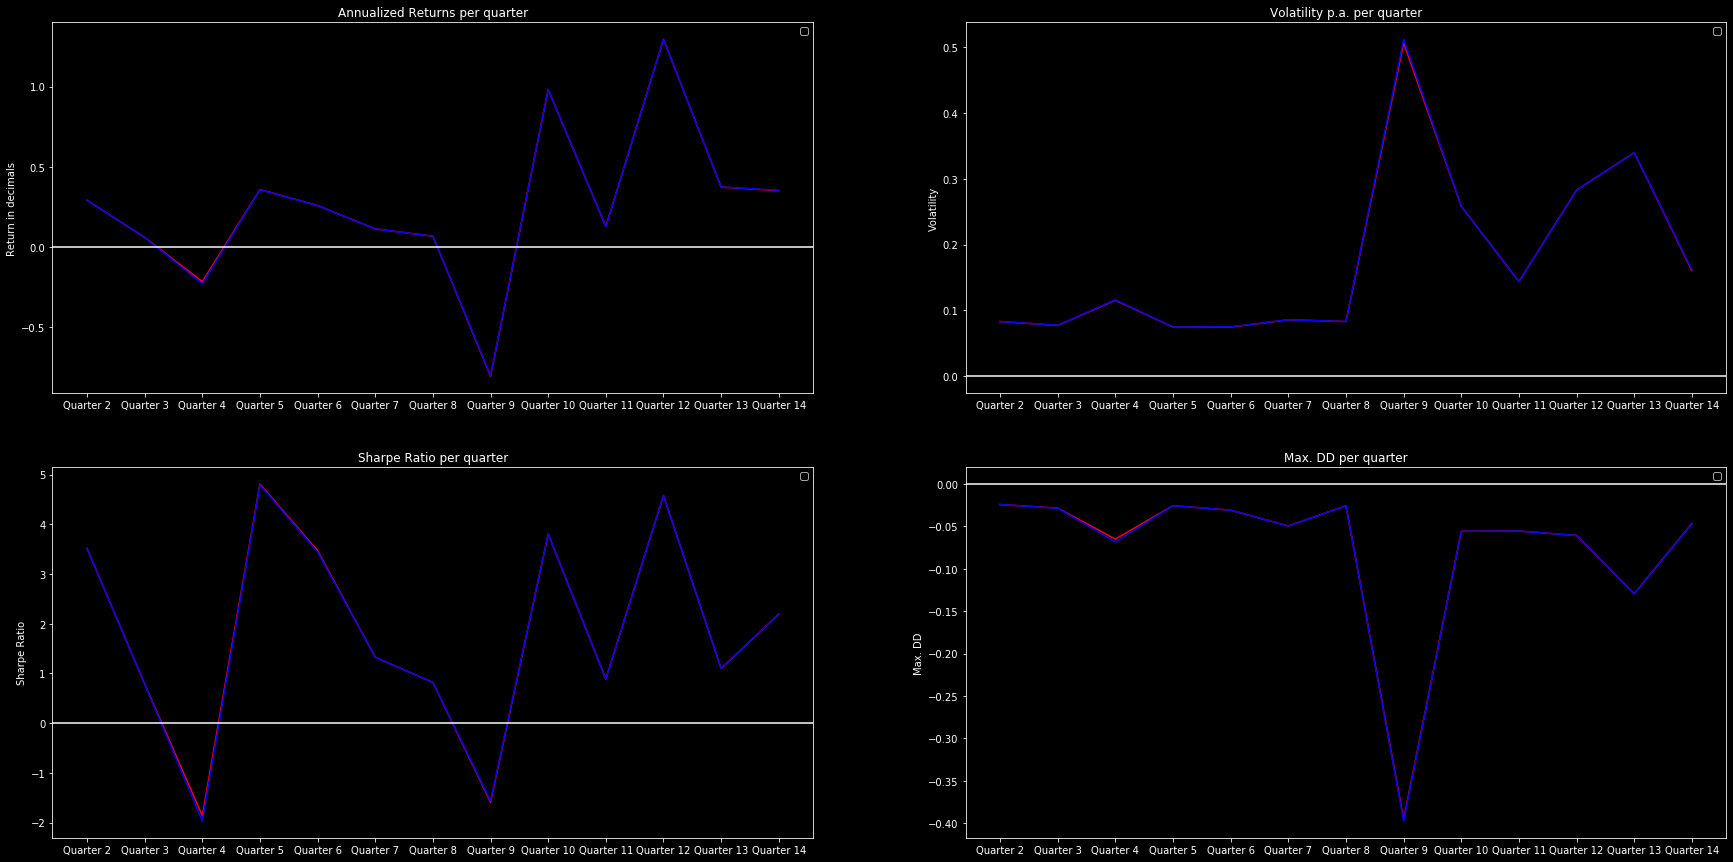

In [25]:
#displaying results

fig, ax = plt.subplots(figsize=(30,15))

plt.subplot(2,2,1)
x1 = MSR_df_oos["Return"]
x2 = MSR_df_oos["Return clean"]
plt.plot(x1.index, x1, color= "red")
plt.plot(x2.index, x2, color= "blue")
plt.legend()
plt.title("Annualized Returns per quarter")
#plt.xlabel("Date")
plt.ylabel("Return in decimals")
plt.axhline(0)

plt.subplot(2,2,2)
x1 = MSR_df_oos["Vola"]
x2 = MSR_df_oos["Vola clean"]
plt.plot(x1.index, x1, color= "red")
plt.plot(x2.index, x2, color= "blue")
plt.legend()
plt.title("Volatility p.a. per quarter")
#plt.xlabel("Date")
plt.ylabel("Volatility")
plt.axhline(0)


plt.subplot(2,2,3)
x1 = MSR_df_oos["Sharpe Ratio"]
x2 = MSR_df_oos["Sharpe Ratio clean"]
plt.plot(x1.index, x1, color= "red")
plt.plot(x2.index, x2, color= "blue")
plt.legend()
plt.title("Sharpe Ratio per quarter")
#plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.axhline(0)

plt.subplot(2,2,4)
x1 = MSR_df_oos["Max. DD"]
x2 = MSR_df_oos["Max. DD clean"]
plt.plot(x1.index, x1, color= "red")
plt.plot(x2.index, x2, color= "blue")
plt.legend()
plt.title("Max. DD per quarter")
plt.ylabel("Max. DD")
plt.axhline(0)


plt.show()

### Comparizon Markowitz vs. ETF vs. 1/N & Given weights

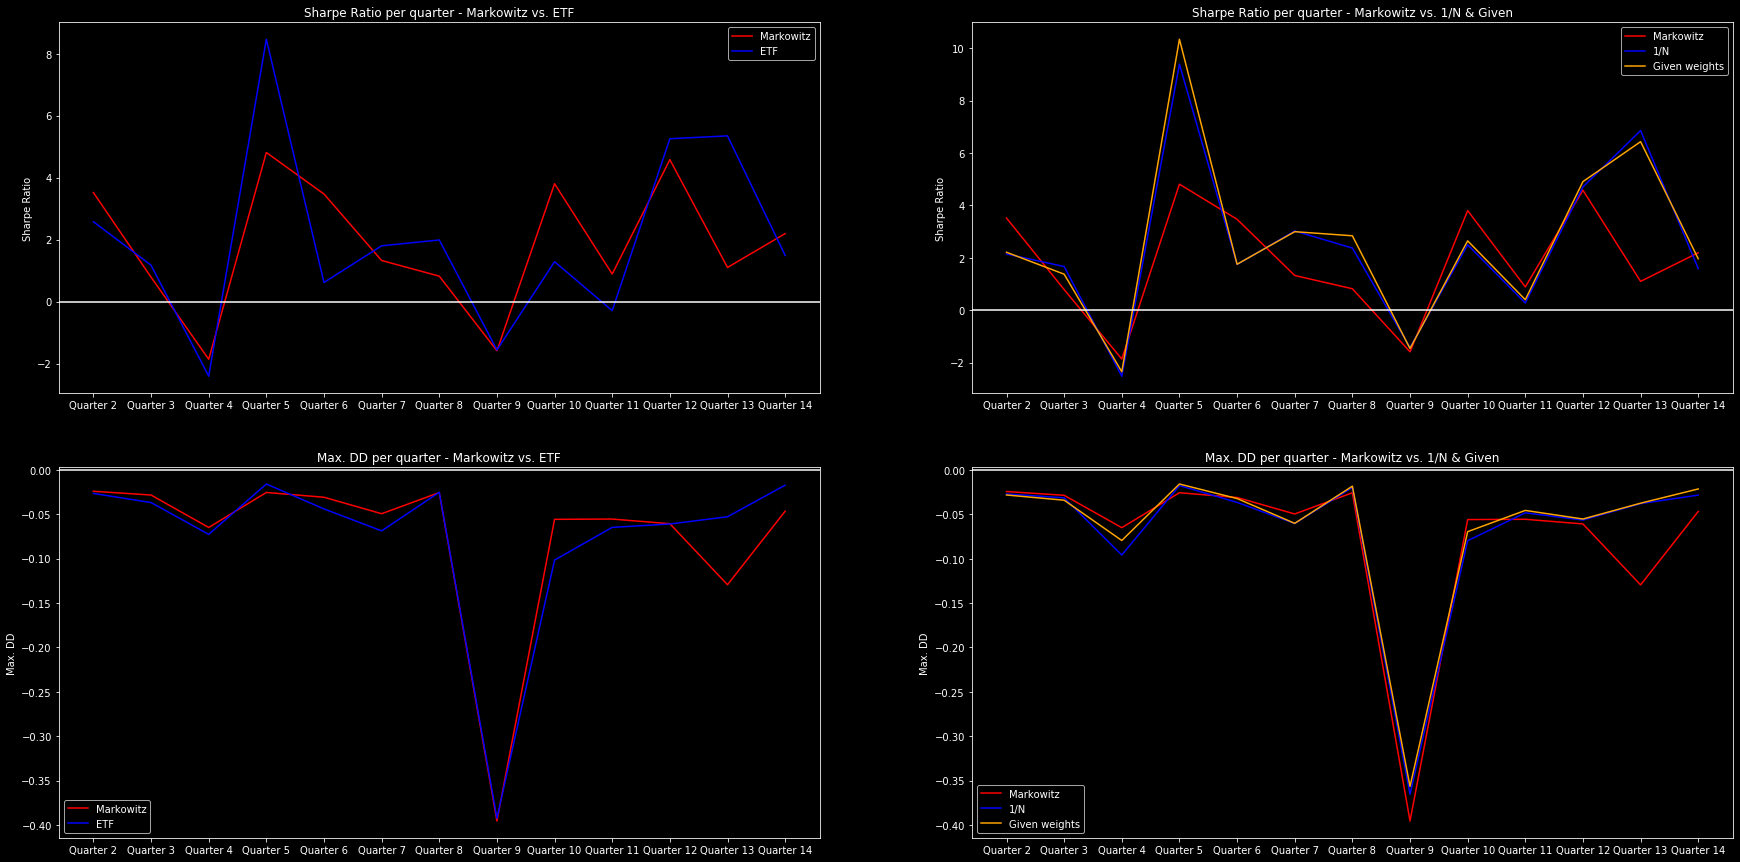

In [26]:
#displaying results

fig, ax = plt.subplots(figsize=(30,15))

plt.subplot(2,2,1)
x1 = MSR_df_oos["Sharpe Ratio"]
x2 = np.array(etf_sharpe_q[len(etf_sharpe_q)-len(MSR_df_oos["Sharpe Ratio"])-1:-1])
plt.plot(x1.index, x1, color= "red", label = 'Markowitz')
plt.plot(x1.index, x2, color= "blue", label = 'ETF')
plt.legend()
plt.title("Sharpe Ratio per quarter - Markowitz vs. ETF")
#plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.axhline(0)


plt.subplot(2,2,3)
x1 = MSR_df_oos["Max. DD"]
x2 = np.array(etf_maxdd_q[len(etf_maxdd_q)-len(MSR_df_oos["Max. DD"])-1:-1])
plt.plot(x1.index, x1, color= "red", label = 'Markowitz')
plt.plot(x1.index, x2, color= "blue", label = 'ETF')
plt.legend()
plt.title("Max. DD per quarter - Markowitz vs. ETF")
#plt.xlabel("Date")
plt.ylabel("Max. DD")
plt.axhline(0)


plt.subplot(2,2,2)
x1 = MSR_df_oos["Sharpe Ratio"]
x2 = np.array(n_sharpe_q[len(n_sharpe_q)-len(MSR_df_oos["Sharpe Ratio"])-1:-1])
x3 = np.array(const_sharpe_q[len(const_sharpe_q)-len(MSR_df_oos["Sharpe Ratio"])-1:-1])
plt.plot(x1.index, x1, color= "red", label = 'Markowitz')
plt.plot(x1.index, x2, color= "blue", label = '1/N')
plt.plot(x1.index, x3, color= "orange", label = 'Given weights')
plt.legend()
plt.title("Sharpe Ratio per quarter - Markowitz vs. 1/N & Given")
#plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.axhline(0)



plt.subplot(2,2,4)
x1 = MSR_df_oos["Max. DD"]
x2 = np.array(n_maxdd_q[len(n_maxdd_q)-len(MSR_df_oos["Max. DD"])-1:-1])
x3 = np.array(const_maxdd_q[len(const_maxdd_q)-len(MSR_df_oos["Sharpe Ratio"])-1:-1])
plt.plot(x1.index, x1, color= "red", label = 'Markowitz')
plt.plot(x1.index, x2, color= "blue", label = '1/N')
plt.plot(x1.index, x3, color= "orange", label = 'Given weights')
plt.legend()
plt.title("Max. DD per quarter - Markowitz vs. 1/N & Given")
#plt.xlabel("Date")
plt.ylabel("Max. DD")
plt.axhline(0)



plt.show()

---

# Exercise 3a)

In [27]:
#import data from file
# data_price = pd.read_excel("Assignments2021_QPM_corrected_09-12-2021.xlsm", sheet_name = "STOXX Global 100 - Price Data")

In [28]:
#clean price data
#data_price - only keep the rows: ticker, initial weights and price time series
df_price = data_price.drop([0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
df_price.reset_index(drop=True, inplace = True)
df_price = df_price.set_index("Ticker")

#create new df for the weights
df_weights = df_price.iloc[:1]/100
#rename index
df_weights.index = df_weights.index.rename("")

#delete weights form other df
df_price = df_price.iloc[1:]
#rename index
df_price.index = df_price.index.rename("Date")
df_price = df_price.truncate("2017-01-01", "2021-08-31")
df_price_change = df_price.truncate("2017-01-01", "2021-08-31").pct_change().iloc[1:]

In [29]:
#find dates at which the quarter ends
df_price_change.index = pd.to_datetime(df_price_change.index)
df_quarter_change = df_price_change.truncate("2017-01-01")
df_quarter_change["Quarter"] = df_quarter_change.index.quarter
#returns_quarter.head()

# idea: create a for loop that detected if quarter (last column) has changed, if so it returns the position(row) in the df
#then take returns between two dates

liste = []
for index in range(len(df_quarter_change["Quarter"])):
    if liste == []:
        liste.append(index)
    elif df_quarter_change["Quarter"][index] == df_quarter_change["Quarter"][index-1]:
        continue
    else:
        liste.append(index)

print(liste)
df_quarter_change.head(5)

[0, 64, 125, 188, 249, 312, 374, 439, 500, 563, 624, 690, 751, 815, 876, 942, 1006, 1068, 1130]


,FMG.AX,GSK.L,0006.HK,HVN.AX,SSE.L,LGEN.L,IGG.L,CEN.NZ,POW.TO,NN.AS,...,LMT,MET,3918.HK,SJM,FITB,TFC,AMGN,CAG,HPQ,Quarter
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.017357,0.010590,0.019619,0.011277,0.011891,0.016304,0.021430,0.000000,0.018698,0.013286,...,0.024651,0.018336,-0.007303,0.018204,0.014019,0.010159,0.042274,0.016388,0.011701,1
2017-01-04,0.025649,0.007119,0.000580,-0.006886,-0.011200,0.013896,0.012256,0.010361,0.013194,-0.005184,...,0.006544,0.009398,0.013349,0.000424,0.017580,0.011542,0.018101,-0.013067,0.019397,1
2017-01-05,-0.001693,0.006436,-0.010486,0.001922,0.004661,-0.020201,0.008698,0.013645,0.002715,-0.011801,...,0.000064,-0.021346,0.023695,-0.002693,-0.035938,-0.020497,-0.006997,-0.011264,-0.008369,1
2017-01-06,0.000312,-0.002224,-0.002709,0.002881,-0.005453,0.006649,0.038861,-0.002292,-0.003957,0.007289,...,-0.002670,-0.003465,-0.018583,-0.010975,-0.001354,-0.003334,0.014692,-0.015240,-0.014501,1
2017-01-09,-0.034567,0.001696,0.021669,0.001499,-0.007439,-0.009334,-0.008020,-0.000453,-0.003395,0.010623,...,0.006876,-0.001890,-0.019544,-0.001006,0.002909,0.000395,0.020264,-0.000767,-0.014452,1


In [30]:
#calibration window

IV_weights = pd.DataFrame()

oos_quarter = 1
for value in liste:
    if value > 250:

        IV_weight_columns = df_price_change.columns

        inverse_vol = 1/df_price_change.iloc[value-250 : value].std()
        IV_weights_ = np.array(inverse_vol / inverse_vol.sum())
        IV_weights_ = np.reshape(IV_weights_,(1, IV_weights_.size))             #have a timeframe that has one year and ends at quarter end

        #capture weights
        IV_weights_ = pd.DataFrame(IV_weights_, columns=IV_weight_columns, index=["Weight " + str(oos_quarter)])

        IV_weights = IV_weights.append(IV_weights_)

        oos_quarter += 1

IV_weights

,FMG.AX,GSK.L,0006.HK,HVN.AX,SSE.L,LGEN.L,IGG.L,CEN.NZ,POW.TO,NN.AS,...,UBSG.SW,LMT,MET,3918.HK,SJM,FITB,TFC,AMGN,CAG,HPQ
Weight 1,0.004875,0.009672,0.010949,0.006030,0.009892,0.011592,0.006041,0.009438,0.012510,0.010506,...,0.010171,0.010937,0.008009,0.004584,0.007662,0.008190,0.009119,0.009031,0.009350,0.007517
Weight 2,0.005820,0.009780,0.010672,0.006374,0.010213,0.011376,0.006198,0.009610,0.013132,0.011146,...,0.009434,0.009494,0.007931,0.004683,0.007096,0.008049,0.009018,0.008882,0.008983,0.007635
Weight 3,0.006268,0.009641,0.013263,0.006919,0.009006,0.011950,0.006653,0.010272,0.014074,0.011088,...,0.009586,0.009108,0.008106,0.004469,0.006966,0.008022,0.008948,0.009103,0.008273,0.007734
Weight 4,0.006292,0.009712,0.013347,0.007658,0.009067,0.010678,0.006564,0.011839,0.013331,0.010873,...,0.008867,0.008680,0.007464,0.005029,0.007876,0.007891,0.009098,0.008540,0.006669,0.007270
Weight 5,0.005437,0.010228,0.014303,0.008023,0.008929,0.009650,0.005623,0.011486,0.012462,0.010920,...,0.008477,0.008926,0.007938,0.005046,0.007671,0.007540,0.008959,0.008878,0.005766,0.006417
Weight 6,0.004790,0.010402,0.015563,0.007229,0.008575,0.009463,0.005185,0.011126,0.010838,0.010499,...,0.009004,0.009218,0.008152,0.005115,0.008152,0.007644,0.008979,0.008815,0.005235,0.006282
Weight 7,0.004532,0.010266,0.014318,0.007023,0.009402,0.008425,0.005186,0.009433,0.010821,0.010143,...,0.008688,0.009377,0.008095,0.005395,0.008620,0.007436,0.008743,0.008099,0.005182,0.006070
Weight 8,0.004258,0.010873,0.013682,0.006607,0.008284,0.006838,0.005087,0.007900,0.009857,0.009943,...,0.008759,0.010595,0.009358,0.005357,0.008640,0.007595,0.008745,0.008609,0.004926,0.005725
Weight 9,0.006885,0.013651,0.016313,0.008092,0.008838,0.006771,0.008597,0.010303,0.006869,0.009085,...,0.009951,0.009226,0.007176,0.007850,0.011097,0.006143,0.006880,0.009950,0.007993,0.007481
Weight 10,0.007543,0.014563,0.015995,0.007952,0.008971,0.006198,0.010073,0.010988,0.006945,0.008944,...,0.009388,0.009664,0.006800,0.008402,0.011701,0.005521,0.006145,0.010499,0.009511,0.007042


In [31]:
counter = 0
iloc_counter = 0
IV_df_oos = pd.DataFrame(columns=["Return", "Vola", "Sharpe Ratio", "Max. DD"])

for value in liste:
    if value > 331:
        IV_input_oos = df_price.iloc[value-64 : value].pct_change()                   #have a timeframe that has one quarter and ends at quarter end
        IV_performance_df = pd.DataFrame()
        IV_performance_df["returns_raw"]     = (IV_input_oos * IV_weights.iloc[counter])    .sum(axis=1)       

        #now that we have return series, take mean, std, max_dd and sharpe ratio
        IV_return_raw   = IV_performance_df["returns_raw"].mean() *250
        
        IV_vola_raw   = IV_performance_df["returns_raw"].std() * sqrt(250)

        IV_sharpe_raw   = sharpe(0, IV_return_raw, IV_vola_raw)
        
        IV_max_dd_raw   = max_dd((IV_performance_df["returns_raw"] +1).cumprod())

        #add to dataframe
        IV_df_oos.loc[str("Quarter " + str(iloc_counter + 2))] = [IV_return_raw, IV_vola_raw, IV_sharpe_raw, IV_max_dd_raw]
        iloc_counter += 1

        #print everything and reference quarter
        print("\nQuarter: " + str(int(counter+2)))
        print("Returns p.a. (raw): " + str(IV_return_raw))
        print("Vola p.a. (raw): " + str(IV_vola_raw))
        print("Sharpe Ratio (raw): " + str(IV_sharpe_raw))
        print("Maximum draw-down (raw): " + str(IV_max_dd_raw))

        counter += 1

IV_df_oos


Quarter: 2
Returns p.a. (raw): 0.18841668103139306
Vola p.a. (raw): 0.07050959487815943
Sharpe Ratio (raw): 2.6722133541821798
Maximum draw-down (raw): -0.024788011353204187

Quarter: 3
Returns p.a. (raw): 0.1355173300749532
Vola p.a. (raw): 0.051296847627797314
Sharpe Ratio (raw): 2.641825693817441
Maximum draw-down (raw): -0.028061116773238304

Quarter: 4
Returns p.a. (raw): -0.34867246087193676
Vola p.a. (raw): 0.11198293822410507
Sharpe Ratio (raw): -3.113621292684413
Maximum draw-down (raw): -0.09506476060338931

Quarter: 5
Returns p.a. (raw): 0.4800457313794051
Vola p.a. (raw): 0.06799471975526698
Sharpe Ratio (raw): 7.060044266778818
Maximum draw-down (raw): -0.016252282696983422

Quarter: 6
Returns p.a. (raw): 0.12848722177938252
Vola p.a. (raw): 0.06784892153933372
Sharpe Ratio (raw): 1.8937253365905786
Maximum draw-down (raw): -0.032899585766431594

Quarter: 7
Returns p.a. (raw): 0.18254215329611578
Vola p.a. (raw): 0.08663002971729197
Sharpe Ratio (raw): 2.1071463774377426


,Return,Vola,Sharpe Ratio,Max. DD
Quarter 2,0.188417,0.070510,2.672213,-0.024788
Quarter 3,0.135517,0.051297,2.641826,-0.028061
Quarter 4,-0.348672,0.111983,-3.113621,-0.095065
Quarter 5,0.480046,0.067995,7.060044,-0.016252
Quarter 6,0.128487,0.067849,1.893725,-0.032900
Quarter 7,0.182542,0.086630,2.107146,-0.056374
Quarter 8,0.181413,0.063332,2.864492,-0.019990
Quarter 9,-0.976886,0.431704,-2.262858,-0.366814
Quarter 10,0.452058,0.268770,1.681953,-0.072177
Quarter 11,-0.017103,0.125497,-0.136282,-0.053208


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


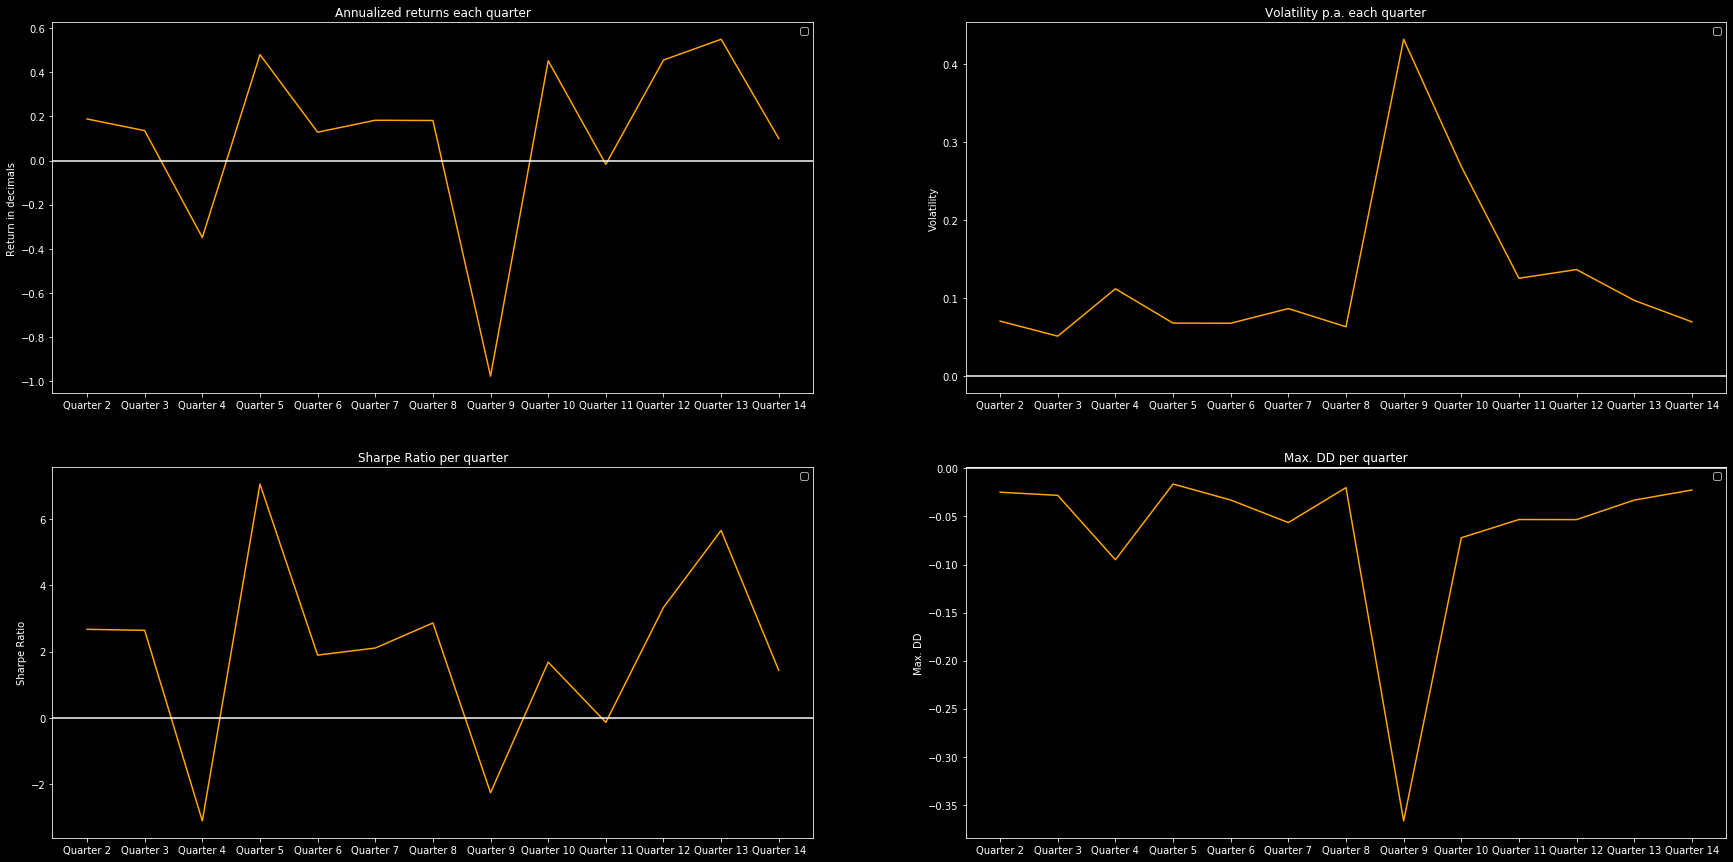

In [32]:
#displaying results

fig, ax = plt.subplots(figsize=(30,15))

plt.subplot(2,2,1)
x1 = IV_df_oos["Return"]
plt.plot(x1.index, x1, color= "orange")
plt.legend()
plt.title("Annualized returns each quarter")
plt.ylabel("Return in decimals")
plt.axhline(0)

plt.subplot(2,2,2)
x1 = IV_df_oos["Vola"]
plt.plot(x1.index, x1, color= "orange")
plt.legend()
plt.title("Volatility p.a. each quarter")
plt.ylabel("Volatility")
plt.axhline(0)

plt.subplot(2,2,3)
x1 = IV_df_oos["Sharpe Ratio"]
plt.plot(x1.index, x1, color= "orange")
plt.legend()
plt.title("Sharpe Ratio per quarter")
#plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.axhline(0)


plt.subplot(2,2,4)
x1 = IV_df_oos["Max. DD"]
plt.plot(x1.index, x1, color= "orange")
plt.legend()
plt.title("Max. DD per quarter")
plt.ylabel("Max. DD")
plt.axhline(0)

plt.show()

# Exercise 3b)

In [33]:
#find dates at which the quarter ends
df_price.index = pd.to_datetime(df_price.index)
df_quarter = df_price.truncate("2017-01-01")
df_quarter["Quarter"] = df_quarter.index.quarter
#returns_quarter.head()

# idea: create a for loop that detected if quarter (last column) has changed, if so it returns the position(row) in the df
#then take returns between two dates

liste = []
for index in range(len(df_quarter["Quarter"])):
    if liste == []:
        liste.append(index)
    elif df_quarter["Quarter"][index] == df_quarter["Quarter"][index-1]:
        continue
    else:
        liste.append(index)

print(liste)
df_quarter.head(5)

[0, 65, 126, 189, 250, 313, 375, 440, 501, 564, 625, 691, 752, 816, 877, 943, 1007, 1069, 1131]


,FMG.AX,GSK.L,0006.HK,HVN.AX,SSE.L,LGEN.L,IGG.L,CEN.NZ,POW.TO,NN.AS,...,LMT,MET,3918.HK,SJM,FITB,TFC,AMGN,CAG,HPQ,Quarter
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,2.59913,14.1124,5.11917,2.36338,12.9679,2.07295,4.19664,2.34421,16.2063,23.7991,...,208.931,38.1205,0.424492,105.492,21.93,37.9462,120.688,32.8914,12.2484,1
2017-01-03,2.64424,14.2619,5.2196,2.39003,13.1221,2.10674,4.28657,2.34421,16.5093,24.1153,...,214.082,38.8194,0.421392,107.412,22.2375,38.3317,125.79,33.4304,12.3917,1
2017-01-04,2.71206,14.3634,5.22263,2.37357,12.9751,2.13602,4.33911,2.3685,16.7272,23.9903,...,215.483,39.1843,0.427018,107.457,22.6284,38.7741,128.067,32.9936,12.6321,1
2017-01-05,2.70747,14.4558,5.16786,2.37814,13.0356,2.09287,4.37685,2.40081,16.7726,23.7072,...,215.497,38.3478,0.437136,107.168,21.8152,37.9794,127.171,32.6219,12.5264,1
2017-01-06,2.70832,14.4237,5.15386,2.38499,12.9645,2.10678,4.54694,2.39531,16.7062,23.88,...,214.921,38.215,0.429013,105.992,21.7857,37.8527,129.039,32.1248,12.3447,1


In [34]:
#calibration window

MinV_weights = pd.DataFrame()

oos_quarter = 1
for value in liste:
    if value > 250:
        input_ = df_price.iloc[value-250 : value]                     #have a timeframe that has one year and ends at quarter end
        mu_ = mean_historical_return(input_, compounding = True)
        s_ = risk_matrix(input_, method="sample_cov")

        ef_ =  EfficientFrontier(mu_, s_)
        MinV_weights_ = ef_.min_volatility()
        MinV_cleaned_weights_ = ef_.clean_weights(cutoff= 0.01)

        #capture weights
        weights_IV = pd.DataFrame(MinV_weights_, columns=MinV_weights_.keys(), index=["Weight " + str(oos_quarter)])
        c_weights_IV = pd.DataFrame(MinV_cleaned_weights_, columns=MinV_cleaned_weights_.keys(), index=["Clean weight " + str(oos_quarter)])
        weights_IV = weights_IV.append(c_weights_IV)
        total_cweight = weights_IV.loc["Clean weight " + str(oos_quarter), :].sum()
        weights_IV.loc["Clean weight " + str(oos_quarter)] = weights_IV.loc["Clean weight " + str(oos_quarter)] / total_cweight

        MinV_weights = MinV_weights.append(weights_IV)

        oos_quarter += 1

MinV_weights.head()

,FMG.AX,GSK.L,0006.HK,HVN.AX,SSE.L,LGEN.L,IGG.L,CEN.NZ,POW.TO,NN.AS,...,UBSG.SW,LMT,MET,3918.HK,SJM,FITB,TFC,AMGN,CAG,HPQ
Weight 1,0.008637,0.0,0.047690,0.001840,0.007656,0.0,0.026544,0.000000,0.0,0.023708,...,0.0,0.028733,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Clean weight 1,0.000000,0.0,0.049526,0.000000,0.000000,0.0,0.027562,0.000000,0.0,0.024623,...,0.0,0.029836,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Weight 2,0.000000,0.0,0.053867,0.012293,0.000000,0.0,0.028881,0.000251,0.0,0.000000,...,0.0,0.031144,0.0,0.003783,0.0,0.0,0.0,0.0,0.0,0.0
Clean weight 2,0.000000,0.0,0.056785,0.012955,0.000000,0.0,0.030443,0.000000,0.0,0.000000,...,0.0,0.032825,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Weight 3,0.000000,0.0,0.060714,0.003120,0.000000,0.0,0.030035,0.008373,0.0,0.000000,...,0.0,0.024050,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
counter = 0
iloc_counter = 2
MinV_df_oos = pd.DataFrame(columns=["Return", "Return clean", "Vola", "Vola clean", "Sharpe Ratio", "Sharpe Ratio clean", "Max. DD", "Max. DD clean"])

for value in liste:
    if value > 330:
        input_oos = df_price.iloc[value-63 : value].pct_change()                   #have a timeframe that has one quarter and ends at quarter end
        MinV_performance_df = pd.DataFrame()
        MinV_performance_df["returns_raw"]     = (input_oos * MinV_weights.iloc[counter])    .sum(axis=1)
        MinV_performance_df["returns_cleaned"] = (input_oos * MinV_weights.iloc[counter +1]) .sum(axis=1)        

        #now that we have return series, take mean, std, max_dd and sharpe ratio
        MinV_return_raw   = MinV_performance_df["returns_raw"].mean() *250
        MinV_return_clean = MinV_performance_df["returns_cleaned"].mean() *250
        
        MinV_vola_raw   = MinV_performance_df["returns_raw"].std() * sqrt(250)
        MinV_vola_clean = MinV_performance_df["returns_cleaned"].std() * sqrt(250)

        MinV_sharpe_raw   = sharpe(0, MinV_return_raw, MinV_vola_raw)
        MinV_sharpe_clean = sharpe(0, MinV_return_clean, MinV_vola_clean)
        
        MinV_max_dd_raw   = max_dd((MinV_performance_df["returns_raw"] +1).cumprod())
        MinV_max_dd_clean = max_dd((MinV_performance_df["returns_cleaned"] +1).cumprod())

        #add to dataframe
        MinV_df_oos.loc[str("Quarter " + str(iloc_counter))] = [MinV_return_raw, MinV_return_clean, MinV_vola_raw, MinV_vola_clean, MinV_sharpe_raw, MinV_sharpe_clean, MinV_max_dd_raw, MinV_max_dd_clean]
        iloc_counter += 1

        #print everything and reference quarter
        print("\nQuarter: " + str(int(counter /2 +2)))
        print("Returns p.a. (raw/clean): " + str(MinV_return_raw) +" "+ str(MinV_return_clean))
        print("Vola p.a. (raw/clean): " + str(MinV_vola_raw) +" "+ str(MinV_vola_clean))
        print("Sharpe Ratio (raw/clean): " + str(MinV_sharpe_raw) +" "+ str(MinV_sharpe_clean))
        print("Maximum draw-down (raw/clean): " + str(MinV_max_dd_raw) +" "+ str(MinV_max_dd_clean))

        counter += 2

MinV_df_oos


Quarter: 2
Returns p.a. (raw/clean): 0.15791665586437456 0.158578802547494
Vola p.a. (raw/clean): 0.06789004056741593 0.06913636200520841
Sharpe Ratio (raw/clean): 2.326065127440316 2.293710544612507
Maximum draw-down (raw/clean): -0.01810878838141794 -0.017614354914366692

Quarter: 3
Returns p.a. (raw/clean): 0.08270852425670153 0.07616017410796397
Vola p.a. (raw/clean): 0.050933765998746945 0.05064366951756625
Sharpe Ratio (raw/clean): 1.6238446663994235 1.5038439124468868
Maximum draw-down (raw/clean): -0.030805054543542765 -0.030947059764902307

Quarter: 4
Returns p.a. (raw/clean): -0.23841860667642897 -0.24259347396275338
Vola p.a. (raw/clean): 0.09556619695461466 0.09571424338171465
Sharpe Ratio (raw/clean): -2.4948006122882167 -2.5345598041795596
Maximum draw-down (raw/clean): -0.06876869910841288 -0.06878469549489796

Quarter: 5
Returns p.a. (raw/clean): 0.4555987422049844 0.4581595563254817
Vola p.a. (raw/clean): 0.05971918928410477 0.06064718892181681
Sharpe Ratio (raw/clean

,Return,Return clean,Vola,Vola clean,Sharpe Ratio,Sharpe Ratio clean,Max. DD,Max. DD clean
Quarter 2,0.157917,0.158579,0.067890,0.069136,2.326065,2.293711,-0.018109,-0.017614
Quarter 3,0.082709,0.076160,0.050934,0.050644,1.623845,1.503844,-0.030805,-0.030947
Quarter 4,-0.238419,-0.242593,0.095566,0.095714,-2.494801,-2.534560,-0.068769,-0.068785
Quarter 5,0.455599,0.458160,0.059719,0.060647,7.629018,7.554506,-0.006803,-0.007136
Quarter 6,0.092859,0.079913,0.046483,0.046687,1.997695,1.711660,-0.022904,-0.022350
Quarter 7,0.083988,0.081126,0.062346,0.061616,1.347135,1.316642,-0.035146,-0.034359
Quarter 8,0.035592,0.040827,0.061057,0.061488,0.582927,0.663972,-0.017727,-0.017678
Quarter 9,-0.831923,-0.801294,0.366420,0.363064,-2.270408,-2.207033,-0.340275,-0.336144
Quarter 10,0.108460,0.113463,0.154712,0.154433,0.701041,0.734706,-0.055304,-0.054352
Quarter 11,-0.114081,-0.114060,0.119645,0.120014,-0.953497,-0.950390,-0.082069,-0.082204


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


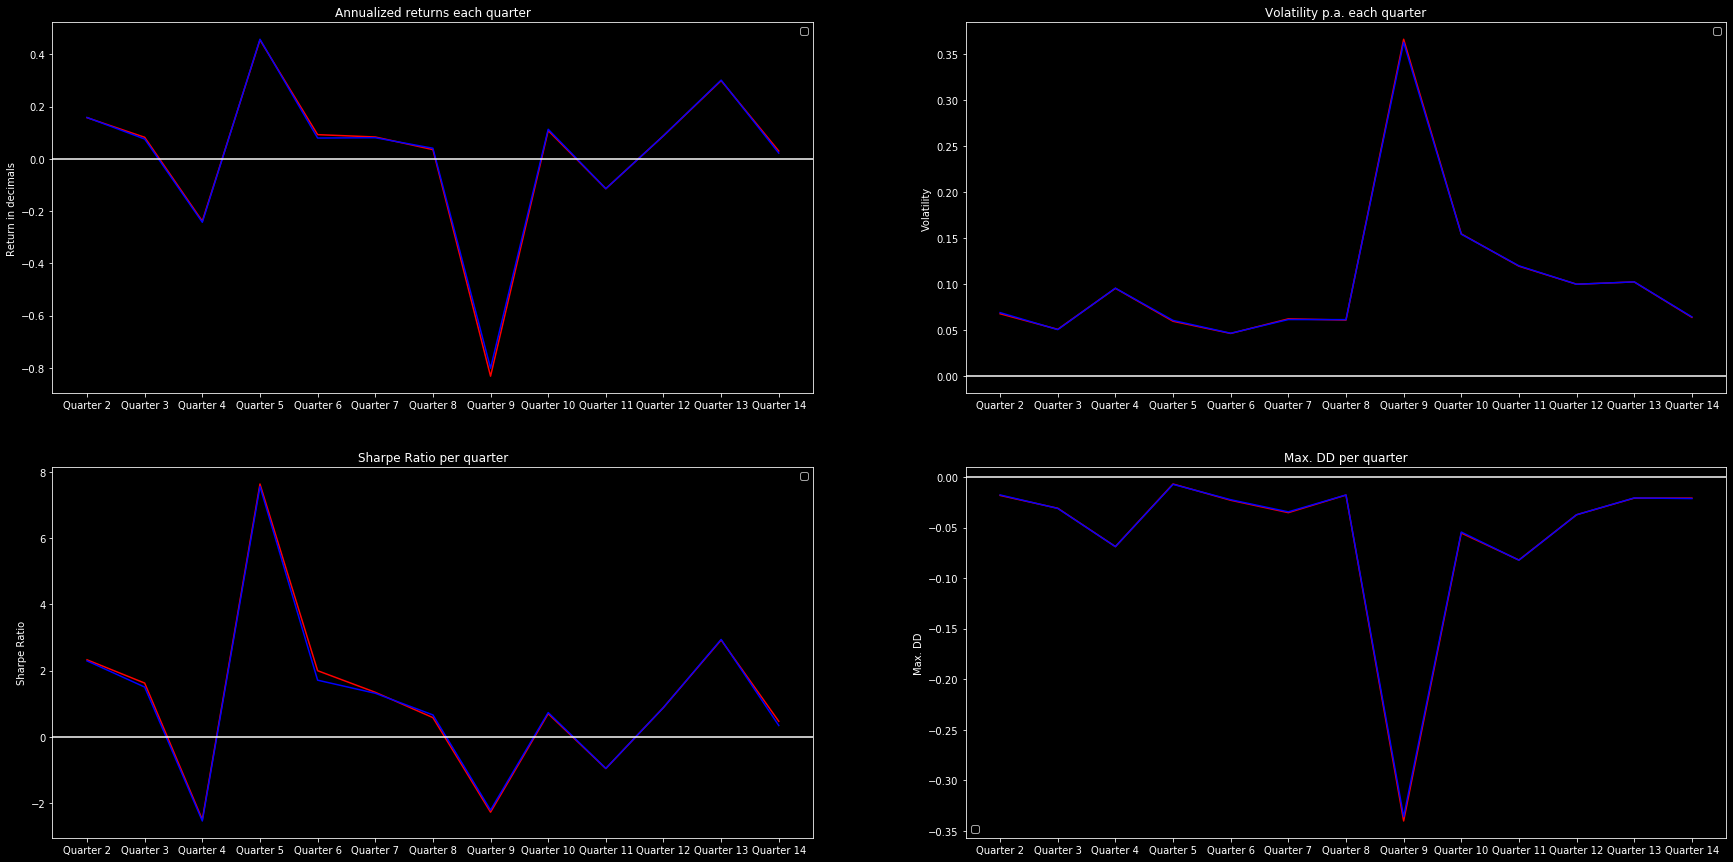

In [36]:
#displaying results

fig, ax = plt.subplots(figsize=(30,15))

plt.subplot(2,2,1)
x1 = MinV_df_oos["Return"]
x2 = MinV_df_oos["Return clean"]
plt.plot(x1.index, x1, color= "red")
plt.plot(x2.index, x2, color= "blue")
plt.legend()
plt.title("Annualized returns each quarter")
plt.ylabel("Return in decimals")
plt.axhline(0)

plt.subplot(2,2,2)
x1 = MinV_df_oos["Vola"]
x2 = MinV_df_oos["Vola clean"]
plt.plot(x1.index, x1, color= "red")
plt.plot(x2.index, x2, color= "blue")
plt.legend()
plt.title("Volatility p.a. each quarter")
plt.ylabel("Volatility")
plt.axhline(0)

plt.subplot(2,2,3)
x1 = MinV_df_oos["Sharpe Ratio"]
x2 = MinV_df_oos["Sharpe Ratio clean"]
plt.plot(x1.index, x1, color= "red")
plt.plot(x2.index, x2, color= "blue")
plt.legend()
plt.title("Sharpe Ratio per quarter")
#plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.axhline(0)


plt.subplot(2,2,4)
x1 = MinV_df_oos["Max. DD"]
x2 = MinV_df_oos["Max. DD clean"]
plt.plot(x1.index, x1, color= "red")
plt.plot(x2.index, x2, color= "blue")
plt.legend()
plt.title("Max. DD per quarter")
plt.ylabel("Max. DD")
plt.axhline(0)

plt.show()

# Portfolio Comparison

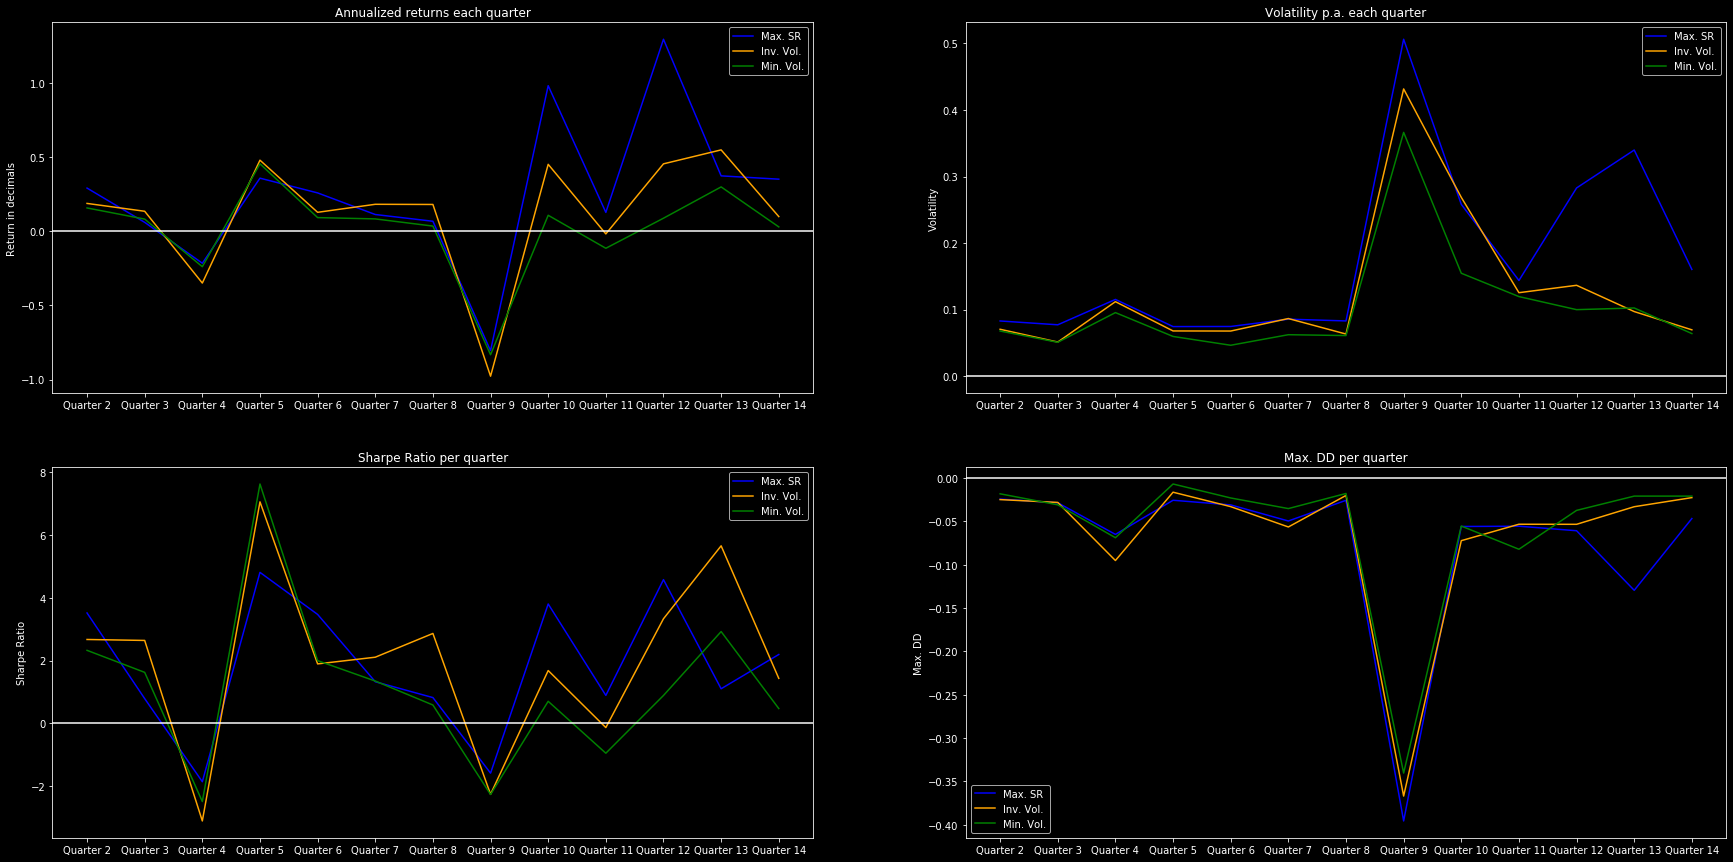

In [37]:
fig, ax = plt.subplots(figsize=(30,15))

plt.subplot(2,2,1)
x1 = MSR_df_oos["Return"]
x2 = IV_df_oos["Return"]
x3 = MinV_df_oos["Return"]
plt.plot(x1.index, x1, label = 'Max. SR', color= "blue")
plt.plot(x2.index, x2, label = 'Inv. Vol.', color= "orange")
plt.plot(x3.index, x3, label = 'Min. Vol.', color= "green")
plt.legend()
plt.title("Annualized returns each quarter")
plt.ylabel("Return in decimals")
plt.axhline(0)

plt.subplot(2,2,2)
x1 = MSR_df_oos["Vola"]
x2 = IV_df_oos["Vola"]
x3 = MinV_df_oos["Vola"]
plt.plot(x1.index, x1, label = 'Max. SR', color= "blue")
plt.plot(x2.index, x2, label = 'Inv. Vol.', color= "orange")
plt.plot(x3.index, x3, label = 'Min. Vol.', color= "green")
plt.legend()
plt.title("Volatility p.a. each quarter")
plt.ylabel("Volatility")
plt.axhline(0)

plt.subplot(2,2,3)
x1 = MSR_df_oos["Sharpe Ratio"]
x2 = IV_df_oos["Sharpe Ratio"]
x3 = MinV_df_oos["Sharpe Ratio"]
plt.plot(x1.index, x1, label = 'Max. SR', color= "blue")
plt.plot(x2.index, x2, label = 'Inv. Vol.', color= "orange")
plt.plot(x3.index, x3, label = 'Min. Vol.', color= "green")
plt.legend()
plt.title("Sharpe Ratio per quarter")
#plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.axhline(0)


plt.subplot(2,2,4)
x1 = MSR_df_oos["Max. DD"]
x2 = IV_df_oos["Max. DD"]
x3 = MinV_df_oos["Max. DD"]
plt.plot(x1.index, x1, label = 'Max. SR', color= "blue")
plt.plot(x2.index, x2, label = 'Inv. Vol.', color= "orange")
plt.plot(x3.index, x3, label = 'Min. Vol.', color= "green")
plt.legend()
plt.title("Max. DD per quarter")
plt.ylabel("Max. DD")
plt.axhline(0)

plt.show()